# How does the purchasing behaviour of new customers differ from that of returning customers?

Here we will analyze how new customers differ from returning customers in terms of their purchasing behavior. We will identify which features matter most for new vs returning customers. We will also build a model to predict whether a customer is likely to become a returning customer. 

The insights we gain from this analysis will help us develop targeted marketing strategies to attract, retain, and maximize the value of both customer groups.

First, let's explore the distribution of new vs. returning customers and compare their purchasing behavior. Then, we will visualize the differences between the two groups.


In [5]:
import pandas as pd

# Load the dataset
file_path = '../data/processed/retail_sales_dataset.csv'

data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Check dataset information
print("\nDataset Information:")
data.info()

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

# Summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(data.describe(include=['object']))

# Summary statistics for boolean columns
print("\nSummary Statistics for Boolean Columns:")
print(data.describe(include=['bool']))

# Custom summary for specific columns
columns_to_describe = ['Total Amount', 'Quantity', 'Customer Type', 'is_discount']
print("\nCustom Summary for Specific Columns:")
print(data[columns_to_describe].describe())


First 5 rows of the dataset:
   Transaction ID        Date Product Category  Quantity  Price per Unit  \
0               1  2023-01-01           Beauty         3             500   
1               2  2023-01-01         Clothing         3             300   
2               3  2023-01-01         Clothing         4             300   
3               4  2023-01-02      Electronics         3              30   
4               5  2023-01-02           Beauty         1              25   

   Total Amount Customer ID  Gender  Age           City              Province  \
0          1500     CUST045  Female   55       Montreal                Quebec   
1           900     CUST041    Male   34  Charlottetown  Prince Edward Island   
2          1200     CUST022    Male   18       Gatineau                Quebec   
3            90     CUST007    Male   46     Saint John         New Brunswick   
4            25     CUST044  Female   22       Gatineau                Quebec   

  Country  Season  is_disco

##### 1. Explore New vs. Returning Customers

Customer Type
Returning    950
New           50
Name: count, dtype: int64


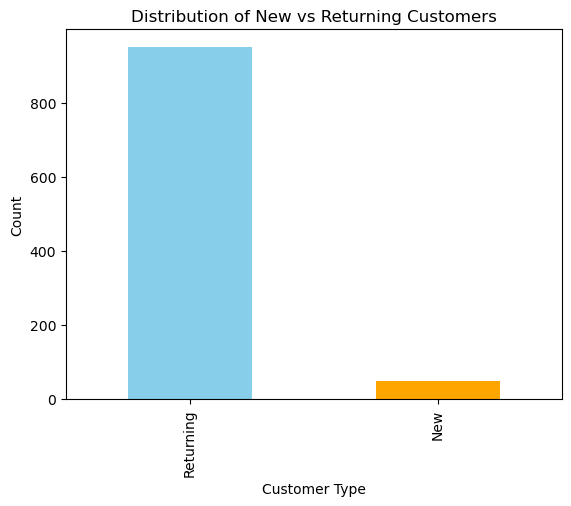

In [5]:
# Count the number of new and returning customers
customer_type_counts = data['Customer Type'].value_counts()
print(customer_type_counts)

# Plot the distribution of customer types
import matplotlib.pyplot as plt

customer_type_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of New vs Returning Customers')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


- The majority of customers are "Returning" customers, with only a small fraction being "New" customers. This indicates a strong base of repeat buyers.

##### 2. Compare Purchasing Behavior

Average Transaction Amount

Customer Type
New          438.700000
Returning    456.910526
Name: Total Amount, dtype: float64


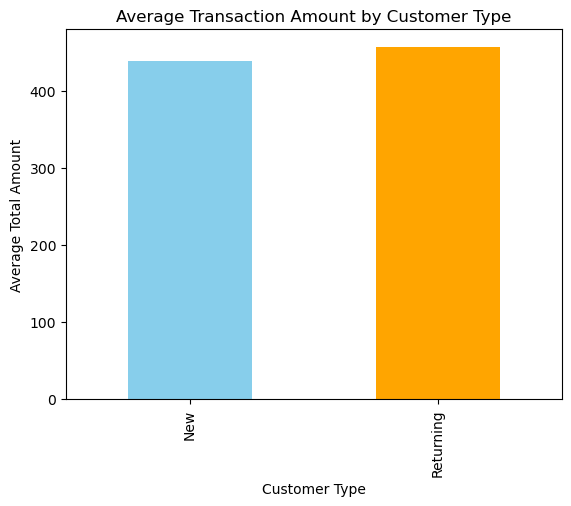

In [6]:
# Calculate average transaction amount for each customer type
avg_transaction_amount = data.groupby('Customer Type')['Total Amount'].mean()
print(avg_transaction_amount)

# Visualize the comparison
avg_transaction_amount.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Transaction Amount by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Total Amount')
plt.show()


- Returning customers have a slightly higher average transaction amount compared to new customers, suggesting they may spend more per purchase.

Average Quantity Purchased

Customer Type
New          2.520000
Returning    2.513684
Name: Quantity, dtype: float64


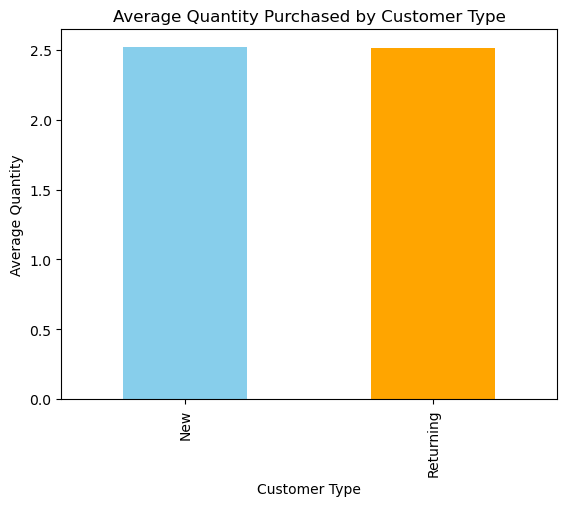

In [7]:
# Calculate average quantity purchased for each customer type
avg_quantity = data.groupby('Customer Type')['Quantity'].mean()
print(avg_quantity)

# Visualize the comparison
avg_quantity.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Quantity Purchased by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Quantity')
plt.show()


- Both new and returning customers purchase similar quantities on average, with a negligible difference between the two groups.

Product Category Preferences

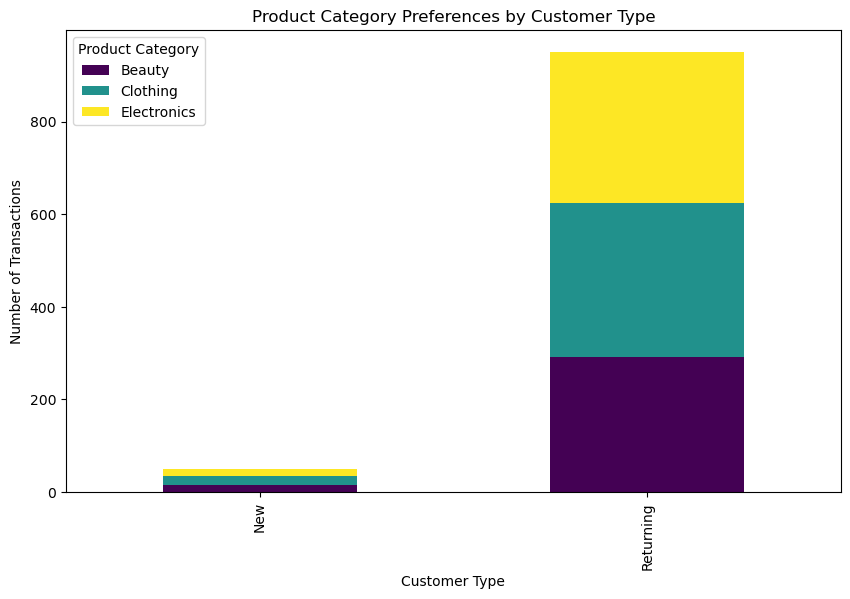

In [8]:
# Count product category purchases by customer type
product_category_counts = data.groupby(['Customer Type', 'Product Category'])['Transaction ID'].count().unstack()

# Plot the product category preferences
product_category_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Product Category Preferences by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Transactions')
plt.legend(title='Product Category')
plt.show()


- Returning customers dominate purchases across all product categories, as expected due to their larger representation.
- The stacked bar chart suggests that all product categories are popular among returning customers, while new customers have a limited contribution across categories.

Discount Usage

Customer Type
New          50.000000
Returning    52.842105
Name: is_discount, dtype: float64


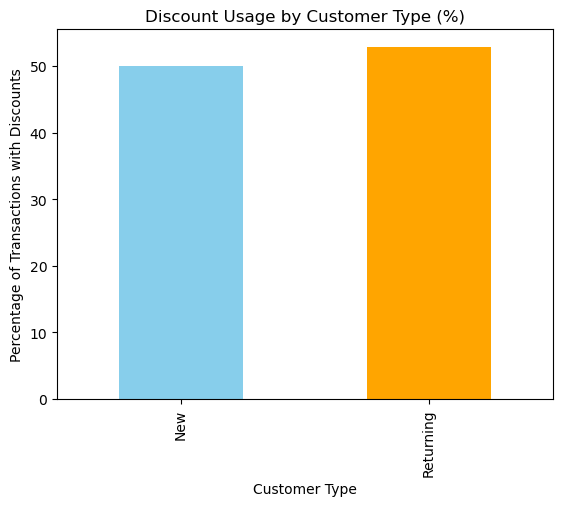

In [9]:
# Calculate percentage of transactions with discounts for each customer type
discount_usage = data.groupby('Customer Type')['is_discount'].mean() * 100
print(discount_usage)

# Visualize discount usage
discount_usage.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Discount Usage by Customer Type (%)')
plt.xlabel('Customer Type')
plt.ylabel('Percentage of Transactions with Discounts')
plt.show()


- Both new and returning customers make significant use of discounts, with returning customers having a slightly higher percentage of transactions with discounts.

Determine the proportion of returning customers for each age group.

Proportion of Returning Customers by Age Group:
           Total_Customers  Returning_Customers  Percent_Returning
Age_Group                                                         
18-25                  194                  184              94.85
26-35                  202                  193              95.54
36-45                  212                  201              94.81
46-55                  265                  251              94.72
55+                    127                  121              95.28


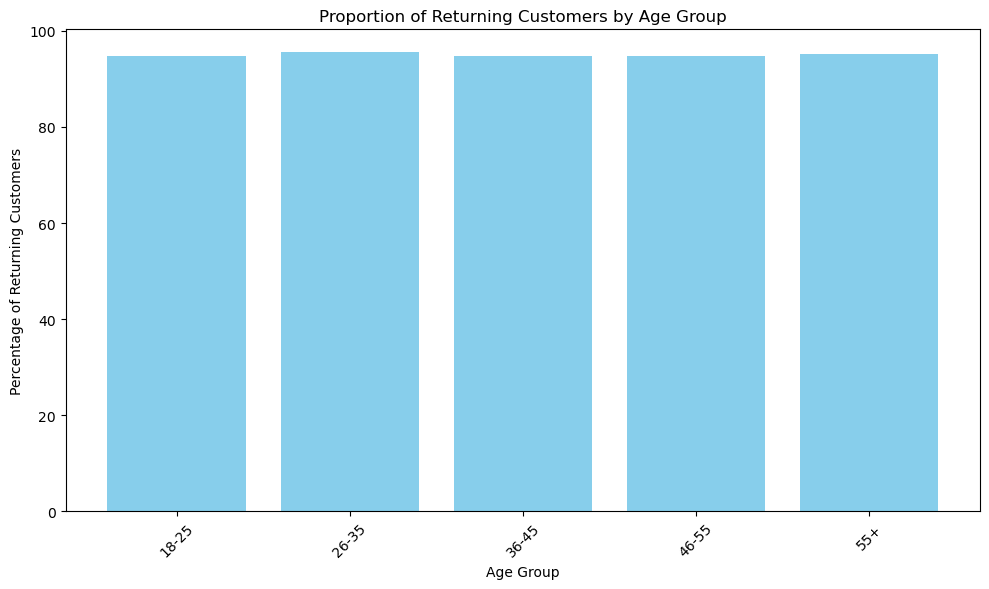

In [6]:
# Create age groups and calculate proportion of returning customers
age_bins = [0, 25, 35, 45, 55, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '55+']

# Add age group column
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate proportion of returning customers for each age group
age_group_details = pd.DataFrame({
    'Total_Customers': data.groupby('Age_Group', observed=True).size(),
    'Returning_Customers': data.groupby('Age_Group', observed=True)['Customer Type'].apply(lambda x: (x == 'Returning').sum()),
})

# Calculate percentage
age_group_details['Percent_Returning'] = (age_group_details['Returning_Customers'] / age_group_details['Total_Customers'] * 100).round(2)

print("Proportion of Returning Customers by Age Group:")
print(age_group_details)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(age_group_details.index, age_group_details['Percent_Returning'], color='skyblue')
plt.title('Proportion of Returning Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Returning Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- This suggests that customer retention is consistently strong across all age groups, with only slight variations. This indicates that age alone may not be a significant differentiator in predicting whether a customer will return.

We chose to do Random Forest for our analysis because it effectively handles imbalanced datasets, captures complex relationships in data, and provides robust performance without extensive preprocessing. It also automatically evaluates which features (e.g., month, total amount, discount usage) are most useful in distinguishing between customer types.

How well does the model predict?

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.27      0.36        15
           1       0.96      0.99      0.98       285

    accuracy                           0.95       300
   macro avg       0.77      0.63      0.67       300
weighted avg       0.94      0.95      0.95       300

Confusion Matrix:
 [[  4  11]
 [  3 282]]
ROC-AUC Score (How well the model distinguishes between classes): 0.9774269005847953


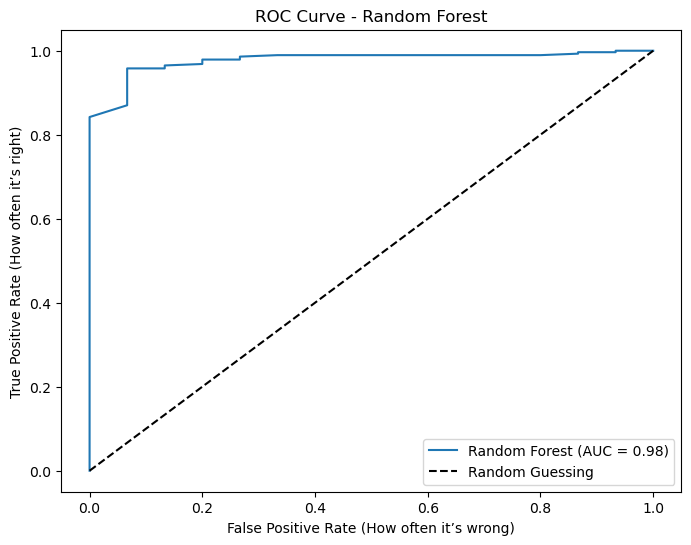


Which Features Matter Most:
                         Feature  Contribution
4                          Month      0.415845
11                 Season_Winter      0.249553
3                            Age      0.065890
0                   Total Amount      0.059121
9                  Season_Spring      0.045933
5                      DayOfWeek      0.042341
10                 Season_Summer      0.040292
1                       Quantity      0.028806
2                    is_discount      0.014989
7      Product Category_Clothing      0.012866
6                    Gender_Male      0.012210
8   Product Category_Electronics      0.012153


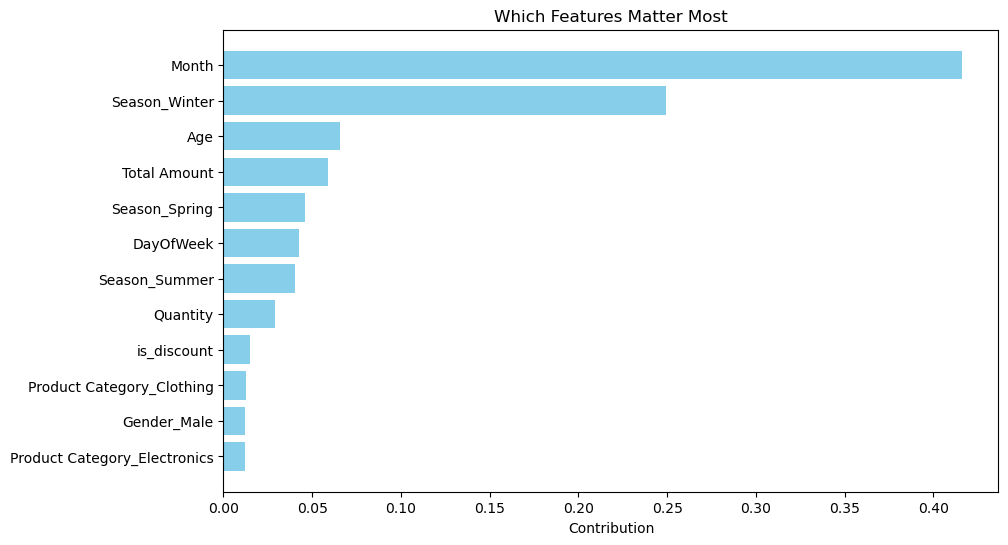

In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../data/processed/retail_sales_dataset.csv'
data = pd.read_csv(file_path)

# Feature engineering: Add more features
# Extract the month and day of the week from the 'Date' column
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Convert 'Gender', 'Product Category', and 'Season' into numbers (one-hot encoding)
data = pd.get_dummies(data, columns=['Gender', 'Product Category', 'Season'], drop_first=True)

# Select features (the details about customers and their purchases)
features = [
    'Total Amount', 'Quantity', 'is_discount', 'Age', 'Month', 'DayOfWeek'
] + [col for col in data.columns if col.startswith('Gender_') or col.startswith('Product Category_') or col.startswith('Season_')]

X = data[features]

# Label the target (whether the customer is new or returning)
y = data['Customer Type'].map({'New': 0, 'Returning': 1})

# Split the dataset into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features to make them easier for the model to understand
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_rf = rf_clf.predict(X_test_scaled)
y_pred_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

print("How well does the model predict?\n")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score (How well the model distinguishes between classes):", roc_auc_score(y_test, y_pred_proba_rf))

# Plot the ROC Curve (shows how good the model is at distinguishing between new and returning customers)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate (How often it’s wrong)')
plt.ylabel('True Positive Rate (How often it’s right)')
plt.legend()
plt.show()

# Find out which features matter most
feature_contributions = pd.DataFrame({
    'Feature': features,
    'Contribution': rf_clf.feature_importances_
}).sort_values(by='Contribution', ascending=False)

print("\nWhich Features Matter Most:")
print(feature_contributions)

# Plot the contributions of each feature
plt.figure(figsize=(10, 6))
plt.barh(feature_contributions['Feature'], feature_contributions['Contribution'], color='skyblue')
plt.title('Which Features Matter Most')
plt.xlabel('Contribution')
plt.gca().invert_yaxis()
plt.show()


##### Breakdown of the Report

Class 0 (New Customers):
- Precision: 0.57  
  - Out of all customers predicted as new, only 57% were actually new.  
  - Shows the model struggles with false positives for this class.  
- Recall: 0.27  
  - Out of all actual new customers, only 27% were identified correctly.  
  - Indicates the model misses many new customers.  
- F1-Score: 0.36  
  - A combination of low precision and recall results in a low F1-score.  
- Support: 15  
  - There are only 15 actual new customers in the test set, making it a minority class.

Class 1 (Returning Customers):
- Precision: 0.96  
  - Out of all customers predicted as returning, 96% were correct.  
  - Shows the model is excellent at predicting returning customers.  
- Recall: 0.99  
  - Out of all actual returning customers, 99% were identified correctly.  
  - Indicates very few false negatives.  
- F1-Score: 0.98  
  - High precision and recall result in an excellent F1-score.  
- Support: 285  
  - There are 285 actual returning customers in the test set, making it the majority class.

---

Overall Metrics:

Accuracy: 
- 0.95 (95%)  
  - The percentage of total correct predictions (both new and returning customers).  
  - High accuracy due to the dominance of returning customers.

Macro Avg:
- Average of precision, recall, and F1-score across both classes.  
  - Precision: 0.77, Recall: 0.63, F1-Score: 0.67  
  - Gives equal importance to both classes, highlighting the struggles with new customers.

Weighted Avg:
- Weighted average, accounting for the number of examples in each class.  
  - Precision: 0.94, Recall: 0.95, F1-Score: 0.95  
  - Heavily influenced by the majority class (returning customers).  
  - Overall excellent performance but masks issues with the minority class (new customers).



The model does a fantastic job predicting **Returning Customers**, but it struggles with **New Customers** due to the imbalance in the dataset.



In [19]:
# Install imbalanced-learn to handle the imbalance in the dataset
!python -m pip install imbalanced-learn


  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)


In the retail dataset, there were significantly fewer new customers compared to returning customers, which have caused the model to favor the majority class (returning customers) and perform poorly on the minority class (new customers). 

We used imbalanced-learn specifically SMOTE (Synthetic Minority Oversampling Technique) to ensure that the model gave equal importance to both new and returning customers. SMOTE balanced the dataset by creating synthetic examples for the minority class, improving the model's ability to identify new customers and resulting in a more fair and accurate classifier.

Random Forest Classification Report (with SMOTE):
               precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.99      0.98      0.98       285

    accuracy                           0.96       300
   macro avg       0.80      0.85      0.82       300
weighted avg       0.97      0.96      0.96       300

Confusion Matrix:
 [[ 11   4]
 [  7 278]]
ROC-AUC Score: 0.9720467836257309


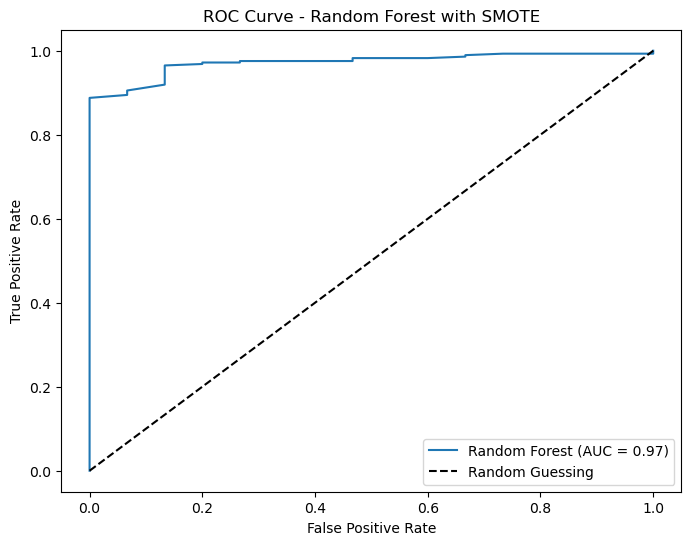

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '../data/processed/retail_sales_dataset.csv'
data = pd.read_csv(file_path)

# Feature engineering: Add more features
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Gender', 'Product Category', 'Season'], drop_first=True)

# Select features
features = [
    'Total Amount', 'Quantity', 'is_discount', 'Age', 'Month', 'DayOfWeek'
] + [col for col in data.columns if col.startswith('Gender_') or col.startswith('Product Category_') or col.startswith('Season_')]

X = data[features]
y = data['Customer Type'].map({'New': 0, 'Returning': 1})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_rf = rf_clf.predict(X_test_scaled)
y_pred_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest Classification Report (with SMOTE):\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.title('ROC Curve - Random Forest with SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Interpretation of the Curve:

- The curve rises sharply at the beginning, showing that the model quickly captures most true positives without many false positives.
- The curve approaches the top-left corner, indicating a very strong ability to differentiate classes.
- This high ROC-AUC value (0.97) confirms that the model is highly effective at distinguishing between new and returning customers.


Summary of Results (with SMOTE)

1. Classification Performance:
- New Customers (Class 0):
  - Precision: 61% of customers predicted as new were correct.
  - Recall: 73% of actual new customers were identified.
  - F1-Score: 67%, showing balanced performance for new customers.
  
- Returning Customers (Class 1):
  - Precision: 99% of customers predicted as returning were correct.
  - Recall: 98% of actual returning customers were identified.
  - F1-Score: 98%, indicating excellent performance for the majority class.

2. Overall Metrics:
- Accuracy: 96% of all customers were correctly classified.
- Macro Average: Shows balanced improvement across both classes.
- Weighted Average: Strong overall performance, influenced by the larger majority class.

3. Confusion Matrix Highlights:
- New Customers: 
  - 11 correctly identified. 
  - 4 misclassified as returning.
- Returning Customers: 
  - 278 correctly identified. 
  - 7 misclassified as new.

4. ROC-AUC Score:
- 0.97 (Excellent): The model is highly effective at distinguishing between new and returning customers.
  - ROC-AUC measures how well a model can separate two classes. A high AUC (close to 1) indicates that the model is good at identifying both classes correctly, making it an essential metric for evaluating classification performance, especially when the dataset is imbalanced.
  
The model performs exceptionally well, especially for returning customers, with noticeable improvement in identifying new customers after applying SMOTE.










Significance of the Results
- Returning Customers:
  - The model predicts returning customers with extremely high precision (99%) and recall (98%), meaning their purchasing behaviors are consistent and well-defined.
  - Likely behaviors:
    - Larger transaction amounts.
    - Higher quantities purchased.
    - Consistent patterns aligned with repeat purchases or loyalty.

- New Customers:
  - The model identifies new customers with a precision of 61% and recall of 73%, suggesting varied purchasing behavior.
  - Likely behaviors:
    - Lower transaction amounts.
    - Fewer items purchased or products from different categories.
    - Greater influence from discounts or seasonal factors.

The features used by the model help highlight the differences:
- Total Amount: Returning customers may consistently spend more per transaction.
- Quantity: Returning customers might buy more items per purchase.
- Seasonality: New customers may shop more during specific times (e.g., sales or holidays).
- Discount Usage: New customers might be more sensitive to discounts.



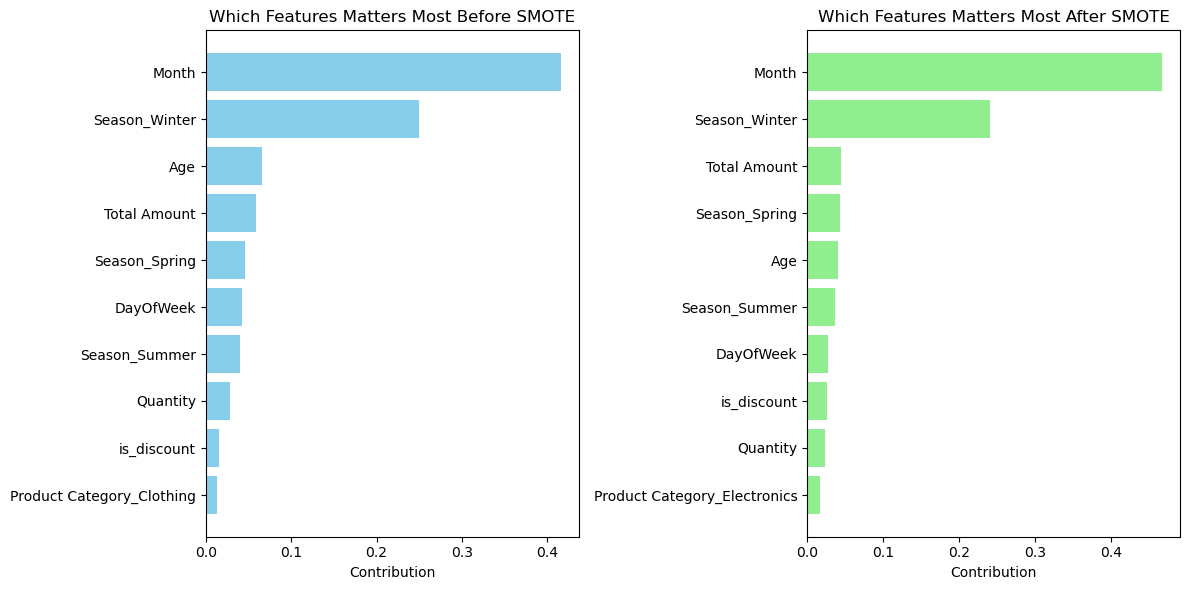


Top 10 Features Before SMOTE:
                      Feature  Contribution
4                       Month      0.415845
11              Season_Winter      0.249553
3                         Age      0.065890
0                Total Amount      0.059121
9               Season_Spring      0.045933
5                   DayOfWeek      0.042341
10              Season_Summer      0.040292
1                    Quantity      0.028806
2                 is_discount      0.014989
7   Product Category_Clothing      0.012866

Top 10 Features After SMOTE:
                         Feature  Contribution
4                          Month      0.467033
11                 Season_Winter      0.240717
0                   Total Amount      0.044945
9                  Season_Spring      0.043891
3                            Age      0.040530
10                 Season_Summer      0.036931
5                      DayOfWeek      0.027190
2                    is_discount      0.025641
1                       Quantity

In [13]:
# After running SMOTE and training the model, analyze feature importance
feature_contributions_smote = pd.DataFrame({
    'Feature': features,
    'Contribution': rf_clf.feature_importances_
}).sort_values(by='Contribution', ascending=False)

# Create a comparison of before and after SMOTE
plt.figure(figsize=(12, 6))

# Create two subplots side by side
plt.subplot(1, 2, 1)
plt.barh(feature_contributions.head(10)['Feature'], 
         feature_contributions.head(10)['Contribution'], 
         color='skyblue')
plt.title('Which Features Matters Most Before SMOTE')
plt.xlabel('Contribution')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(feature_contributions_smote.head(10)['Feature'], 
         feature_contributions_smote.head(10)['Contribution'], 
         color='lightgreen')
plt.title('Which Features Matters Most After SMOTE')
plt.xlabel('Contribution')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Print top 10 features for comparison
print("\nTop 10 Features Before SMOTE:")
print(feature_contributions.head(10))
print("\nTop 10 Features After SMOTE:")
print(feature_contributions_smote.head(10))

After applying SMOTE, we noticed some interesting changes in which features matter most for predicting new and returning customers. Month and Season_Winter stayed the top two most important features, showing that seasonal trends strongly influence customer behavior. Total Amount remained important, but Age became less important (dropping from 3rd to 5th place), suggesting it was overvalued before balancing the data. Features like is_discount became more important, highlighting the role of spending and discounts over demographics. Additionally, product categories shifted, with Electronics entering the top 10 and Clothing dropping out, suggesting transactional features like specific product preferences gained more relevance after balancing the dataset. This shows that SMOTE helped create a fairer analysis, focusing on the features that truly matter for accurate predictions.

These insights can guide targeted marketing strategies to attract, retain, and maximize the value of both customer groups.

#### Recommendations for the business
1. Marketing Strategies
- For New Customers:
  - Focus on targeted promotions, introductory offers, and onboarding campaigns to build loyalty.
  - Provide personalized recommendations to encourage larger transactions or repeat purchases.
- For Returning Customers:
  - Strengthen loyalty programs and retention strategies to maintain consistent purchasing behavior.
  - Encourage cross-selling and upselling based on historical patterns.

2. Product and Inventory Planning
- Stock products that appeal to new customers during seasonal events.
- Optimize inventory for returning customers' predictable preferences.

3. Customer Segmentation
- Use the classification model to segment customers dynamically into "new" and "returning."
- Apply these segments to drive data-driven decision-making for promotions and resource allocation.

